## Acesso aos dados

In [2]:
# Imports
import pandas as pd
df = pd.read_csv('pokemon_data.csv')

In [ ]:
# Acessando nome das colunas
print(df.columns)

In [ ]:
# Acessando nome dos 5 primeiros
display(df.head(6))

In [ ]:
# Acessando nome dos 5 ultimos
display(df.tail(5))

In [ ]:
# Acessando colunas individuais
display(df['Nome'])

In [ ]:
# Acessando mais colunas individuais
display(df[['Nome', 'Tipo 1', 'Tipo 2']])

In [ ]:
# Acessando colunas com quantidade de dados
display(df[['Nome', 'Tipo 1', 'Tipo 2']][5:10])

In [ ]:
# Acessando linhas individuais
display(df.iloc[0:5])

In [ ]:
# Acessando linhas e colunas individuais
display(df.iloc[2, 1])

In [ ]:
# Busca pela coluna por 1 valor
df.loc[df['Tipo 1'] == 'Fogo'][:5]

In [ ]:
# Busca pela coluna por 2 valor
display(df.loc[(df['Tipo 1'] == 'Fogo') & (df['Tipo 2'] == 'Voador')])


In [ ]:
# Acessando linhas por nome
for indice, linha in df.iterrows():
    print(indice, linha['Nome'])
    if linha['#'] == 150:
        break

In [ ]:
# Valores estatístico básicos
display(df.describe())

## Ordenação

In [5]:
# Imports
import pandas as pd
df = pd.read_csv('pokemon_data.csv')

In [ ]:
df_ordenado = df.sort_values('Tipo 1', ascending=True)
display(df_ordenado)

## Realizando Mudanças nos dados


In [ ]:
# Imports
import pandas as pd
df = pd.read_csv('pokemon_data.csv')
display(df)

In [ ]:
df['Total'] = df['Vida'] + df['Ataque'] + df['Defensa'] + df['Atq Esp'] + df['Def Esp'] + df['Velocidade']
df

In [ ]:
df = df.drop(columns=['Total'])
df

In [ ]:
# Forma alternativa para criar coluna total
df['Total'] = df.iloc[:,4:10].sum(axis=1)
display(df)

In [ ]:
# Renomeando
df.rename({'Defensa':'Defesa'}, axis=1, inplace=True)
df

In [ ]:
# Reordenar colunas
cols = list(df.columns.values)
df = df [cols[0:4] + [cols[-1]] + cols[5:12]]
display(df)

## Salvar arquivos

In [58]:
# Salvar arquivos
# df.to_csv('Novo_CSV.csv')
df.to_csv('Novo_CSV.csv', index=False, sep=';')
# df.to_csv('Novo_CSV.txt', index=False, sep='\t')

## Filtrando dados

In [ ]:
# Imports
import pandas as pd
df = pd.read_csv('pokemon_data.csv')
display(df)

In [ ]:
# & == AND
novo_df = df.loc[(df['Tipo 1'] == 'Fogo') & (df['Tipo 2'] == 'Agua')]
novo_df

In [ ]:
# | == OR
novo_df = df.loc[(df['Tipo 1'] == 'Fogo') | (df['Tipo 1'] == 'Agua')]
novo_df.reset_index(drop=True, inplace=True)
novo_df

In [ ]:
# Filtrando pelo 'MEGA'
# ~ == ! NOT 
df_mega = df.loc[~df['Nome'].str.contains('Mega ')]
df_mega.reset_index(drop=True, inplace=True)
df_mega

In [ ]:
import re
# EXPRESSÕES REGULARES
novo_df = df.loc[df['Tipo 1'].str.contains('fogo|agua', flags=re.I, regex=True)]
novo_df

In [ ]:
# EXPRESSÕES REGULARES
novo_df = df.loc[df['Tipo 1'].str.contains('agua|fire', flags=re.I, regex=True) & (df['Tipo 2'] == 'Agua')]
novo_df

In [ ]:
# Para filtrar com pi no COMEÇO usa ^pi
pi_df = df.loc[df['Nome'].str.contains('^pi', flags=re.I, regex=True)]
pi_df

In [ ]:
# Para filtrar com pi no FINAL usa pi$
pi_df = df.loc[df['Nome'].str.contains('pi$', flags=re.I, regex=True)]
pi_df

## Mudanças condicionais

In [ ]:
# df.loc[df['Tipo 1'] == 'Fogo', 'QUAL COLUNA QUER MUDAR??'] = 'QUAL NOVO VALOR??'
df.loc[df['Tipo 1'] == 'Fogo', 'Tipo 1'] = 'Fire'
df

In [65]:
# df.loc[df['Tipo 1'] == 'Fogo', 'QUAL COLUNA QUER MUDAR??'] = 'QUAL NOVO VALOR??'
df.loc[df['Total'] > 500, 'Lendario'] = 'True'


In [ ]:
novo_df = df.copy()

# df.loc[df['Tipo 1'] == 'Fogo', 'QUAL COLUNA QUER MUDAR??'] = 'QUAL NOVO VALOR??'
novo_df.loc[novo_df['Tipo 1'] == 'Agua', 'Tipo 1'] = 'Water'

In [ ]:
# df.loc[df['Tipo 1'] == 'Fogo', 'QUAL COLUNA QUER MUDAR??'] = 'QUAL NOVO VALOR??'
novo_df.loc[novo_df['Velocidade'] > 70, ['Lendario', 'Geracao']] = ['Teste 1', '3']
novo_df

## Estatisticas agrupadas (Groupby)

In [ ]:
import pandas as pd
df = pd.read_csv('pokemon_data.csv')
df

In [ ]:
df.groupby(['Tipo 1']).mean(' ').sort_values('Lendario', ascending=False)

In [ ]:
df['contador'] = 1
display(df.groupby(['Tipo 1', 'Tipo 2']).count()['contador'])


## Blocos de memória

In [ ]:
# Carregar linhas de 5 em 5
for df in pd.read_csv('pokemon_original.csv', chunksize=5):
    print(df)

## Plotagem de dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('pokemon_original.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

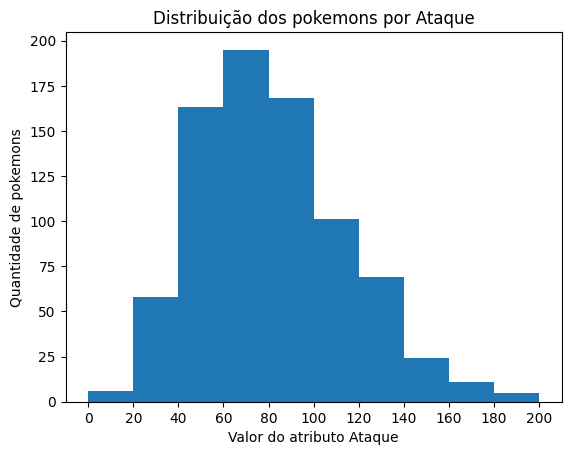

In [32]:
# Histograma
atributo = 'Ataque'
plt.title('Distribuição dos pokemons por ' + atributo)
plt.xlabel('Valor do atributo ' + atributo)
plt.ylabel('Quantidade de pokemons')

bins = range(0,201,20)
plt.xticks(bins)

plt.hist(df[atributo],bins=bins)
plt.show

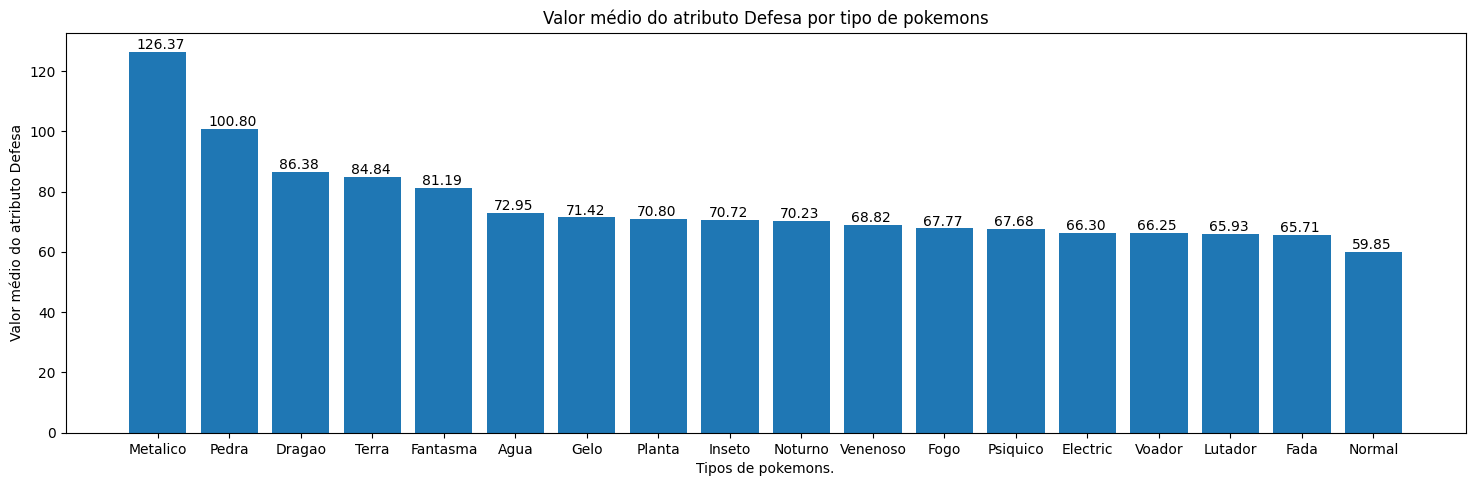

In [66]:
# Barra vertical

atributo = 'Defesa'
tipos = df.groupby('Tipo 1').mean(' ').sort_values(atributo, ascending=False)
linha = tipos.index.tolist()
coluna = tipos[atributo].tolist()

figura = plt.figure(figsize=(14, 4)).add_axes([0,0,1,1])
figura.bar(linha, coluna)

plt.xlabel('Tipos de pokemons.')
plt.ylabel(f'Valor médio do atributo {atributo}')
plt.title(f'Valor médio do atributo {atributo} por tipo de pokemons')

for i, v in enumerate(coluna):
    plt.annotate(f'{v:.2f}', (i-0.3,v+1))

plt.show()